# Pandas-Data-Science

## Data Wrangling

### Data Merge

In [1]:
# Find directory
import os
os.getcwd()

'C:\\Users\\fcoda'

In [2]:
#Set directory
os.chdir('C:\\Users\\fcoda\\Desktop\\Datamining')

In [3]:
#Importing libraries

import pandas as pd

In [4]:
# Task 1: Merge the 12 of sales into a single CSV file

df = pd.read_csv("./Sales/Sales_April_2019.csv") #open a single csv file

df.head() #show us the top 5 rows, si aparecen vamos bien!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
files = [file for file in os.listdir('./Sales')] #making an array with the name of the files

for file in files:
    print(file)    #printing the names

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
all_months_data = pd.DataFrame() #making an empty dataframe

for file in files:
    df = pd.read_csv("./Sales/" + file) #a loop to read every file
    all_months_data = pd.concat([all_months_data, df]) #append the files to a single dataframe

all_months_data.head() #shows the final header

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_months_data.to_csv("all_data.csv", index = False) #makinga csv with the final dataframe

#### Para este punto revisar si se creo el csv en el directorio

### Data Cleaning

In [8]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2] #Extracting the month of the Order Date column
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [55]:
#all_months_data['Month'] = all_months_data['Month'].astype('int32') #This line is a try to convert month into a number

In [12]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)] #We subset the NaN 
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
all_months_data = all_months_data.dropna(how = 'any') #We drop NaN values

In [56]:
#all_months_data['Month'] = all_months_data['Month'].astype('int32') #The second try 

In [15]:
temp_df = all_months_data[all_months_data['Order Date'].str[0:2] == 'Or'] #We search all the rows in wich Order Date starts with Or
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,A
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,A
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,A
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,A
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,A


In [16]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or'] #We do the same as the previous step but with another logit operator

In [17]:
all_months_data['Month'] = all_months_data['Month'].astype('int32') #The last try!!!
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA


In [18]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) #Another way to get ints
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each']) #Also changing price

### Creating new columns

In [19]:
all_months_data['Total'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,11.99


### Question 1: What was the best month for sales and How much was earned that month?

In [20]:
results = all_months_data.groupby('Month').sum() #Grouping and summarize data
results

,Quantity Ordered,Price Each,Total
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


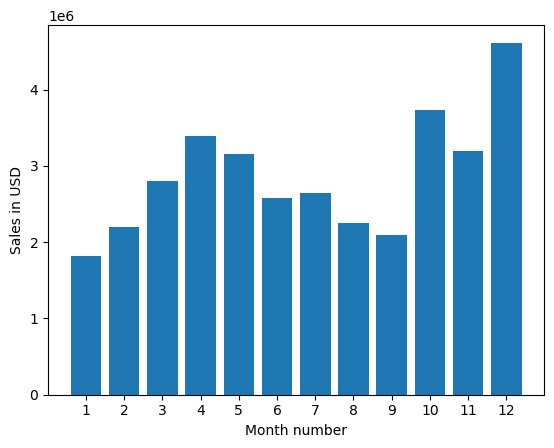

In [21]:
import matplotlib.pyplot as plt

months = range(1,13)
total = results['Total']


plt.bar(months,total)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### Question 2: Wich city had the highest number of sales?

In [25]:
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1]) #we use apply to apply a function into a dataset

#all_months_data = all_months_data.drop(columns = 'Column')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate,Total,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles


In [27]:
all_months_data['Estate'] = all_months_data['Purchase Address'].str[-8:-6]

all_months_data['EstateCity'] = all_months_data['Estate'] + ' ' + all_months_data['City']

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate,Total,City,EstateCity
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,23.90,Dallas,TX Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,99.99,Boston,MA Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.00,Los Angeles,CA Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles


In [28]:
results_2 = all_months_data.groupby('EstateCity').sum() #Grouping and summarize data
results_2

,Quantity Ordered,Price Each,Month,Total
EstateCity,,,,
CA Los Angeles,33289,5421435.23,208325,5452570.80
CA San Francisco,50239,8211461.74,315520,8262203.91
GA Atlanta,16602,2779908.20,104794,2795498.58
MA Boston,22528,3637409.77,141112,3661642.01
ME Portland,2750,447189.25,17144,449758.27
NY New York City,27932,4635370.83,175741,4664317.43
OR Portland,11303,1860558.22,70621,1870732.34
TX Austin,11153,1809873.61,69829,1819581.75
TX Dallas,16730,2752627.82,104620,2767975.40


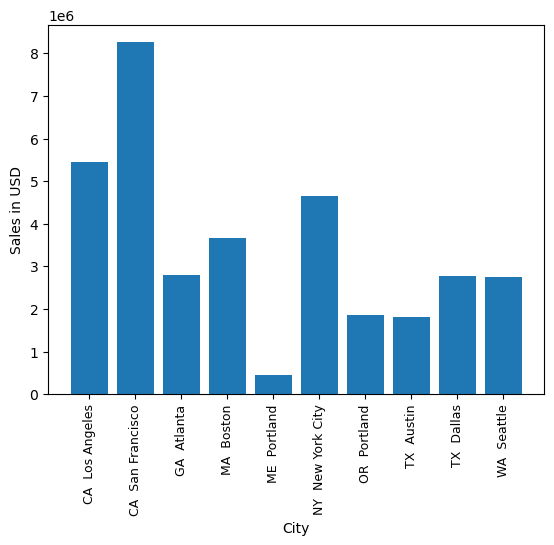

In [29]:
cities = [EstateCity for EstateCity, df in all_months_data.groupby('EstateCity')]
total = results_2['Total']


plt.bar(cities,total)
plt.xticks(cities, rotation = 'vertical', size = 9)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [31]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date']) #We change the data type of order date

In [32]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate,Total,City,EstateCity
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,23.90,Dallas,TX Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,99.99,Boston,MA Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.00,Los Angeles,CA Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles


In [33]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour #Getting the hours
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute #Getting the minutes
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Estate,Total,City,EstateCity,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,TX,23.90,Dallas,TX Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,MA,99.99,Boston,MA Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,600.00,Los Angeles,CA Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,CA,11.99,Los Angeles,CA Los Angeles,9,27


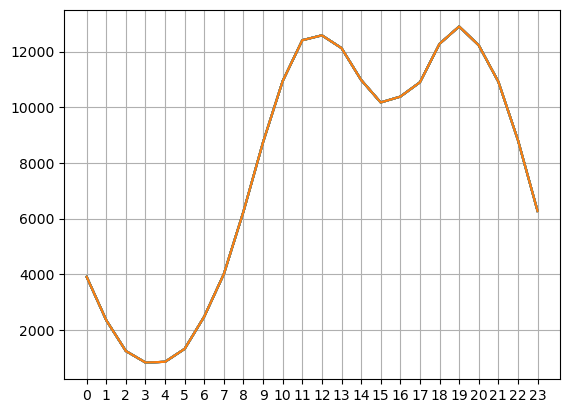

In [40]:
hour = [hour for hour, df in all_months_data.groupby('Hour')] #This line is to get the uniques values of hour and making an array
plt.plot(hour, all_months_data.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [45]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)] #Get the order id that are duplicated

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Doing a join of the order products

df = df[['Order ID', 'Grouped']].drop_duplicates() #Droping the rows that are duplicated

df.head()

<ipython-input-45-2142ba524ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
from itertools import combinations
from collections import Counter

In [47]:
#This cell of the notebook is copied from stackoverflow 
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5_ What product sold the most? Why do you think it sold the most?

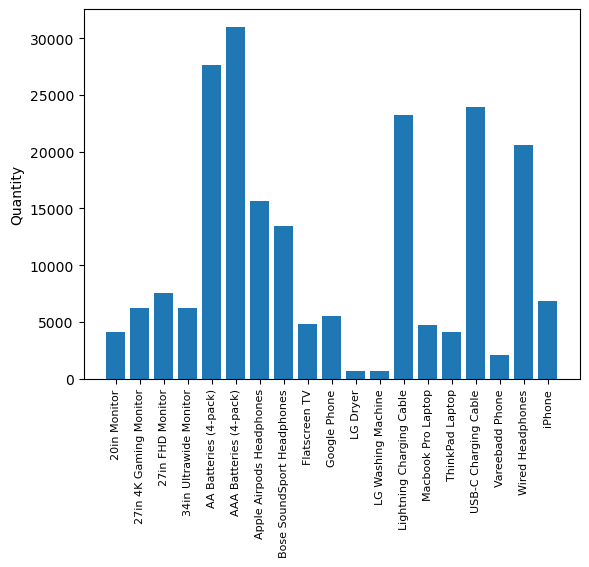

In [54]:
product_group = all_months_data.groupby('Product') #grouping the products

quantity_ordered = product_group.sum()['Quantity Ordered'] #Summarize the quantity ordered

products = [product for product, df in product_group] #Get the unique list

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size =8)
plt.ylabel('Quantity')
plt.show()

<ipython-input-62-51a334a49279>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size =8)


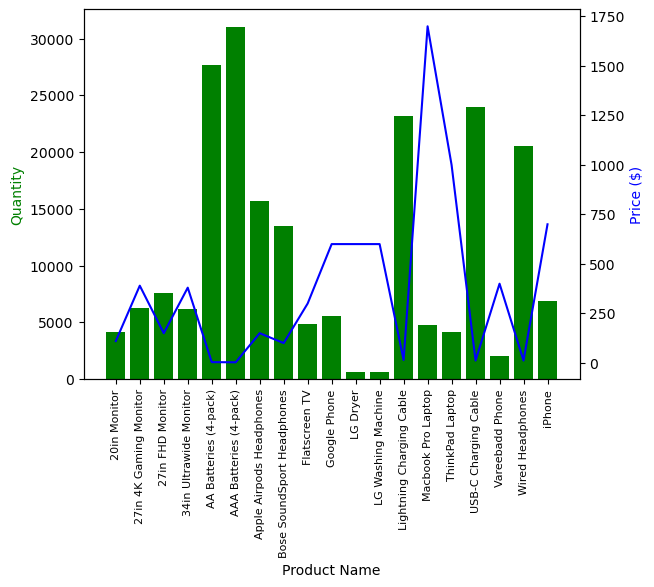

In [62]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity', color ='g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size =8)

plt.show()